# FBN1

This notebook demonstrates how to use gpsea to search for correlations between certain tpes of variant and specific disease genetities.

FBN1 encodes the fibrillin-1 protein. Pathogenic variants in FBN1 are found in Marfan syndrome and a number of other disorders including  [Weill-Marchesani syndrome](https://omim.org/entry/608328) (WMS), [geleophysic dysplasia](https://omim.org/entry/231050) (GPHYSD), [acromicric dysplasia](https://omim.org/entry/102370) (ACMICD), and [Marfan lipodystrophy syndrome](https://omim.org/entry/616914).

We will investigate correlations between variant location and disease diagnosis.

### Set up
First import the libraries and define the transcript and diseases of interest.

In [2]:
import gpsea
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from gpsea.analysis.predicate import PatientCategories
from gpsea.preprocessing import load_phenopacket_folder
from gpsea.preprocessing import configure_caching_cohort_creator
from gpsea.model import FeatureType, VariantEffect
from gpsea.view import CohortViewable
from gpsea.preprocessing import UniprotProteinMetadataService
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService
from gpsea.view import ProteinVisualizable, ProteinVisualizer, ProteinViewable
import hpotk
from IPython.display import display, HTML

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using gpsea version 0.2.1.dev0


### Import the cohort
To finalize, add the phenopackets to this directory
cohort = load_phenopacket_folder(pp_directory=phenopacket_input_folder, cohort_creator=cohort_creator)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_name = 'FBN1'
phenopacket_store_release = '0.1.19'
FBN1_MANE_transcript = 'NM_000138.5'
FBN1_protein_id = "NP_000129.3"

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()


Patients Created: 100%|██████████| 151/151 [02:47<00:00,  1.11s/it]
Validated under none policy
No errors or warnings were found


In [4]:
from IPython.display import display, HTML
from gpsea.view import CohortViewable

viewer = CohortViewable(hpo=hpo)
html = viewer.process(cohort=cohort, transcript_id=FBN1_MANE_transcript)
display(HTML(html))

<Axes: title={'center': 'Fibrillin-1\ntranscript: NM_000138.5, protein: NP_000129.3'}>

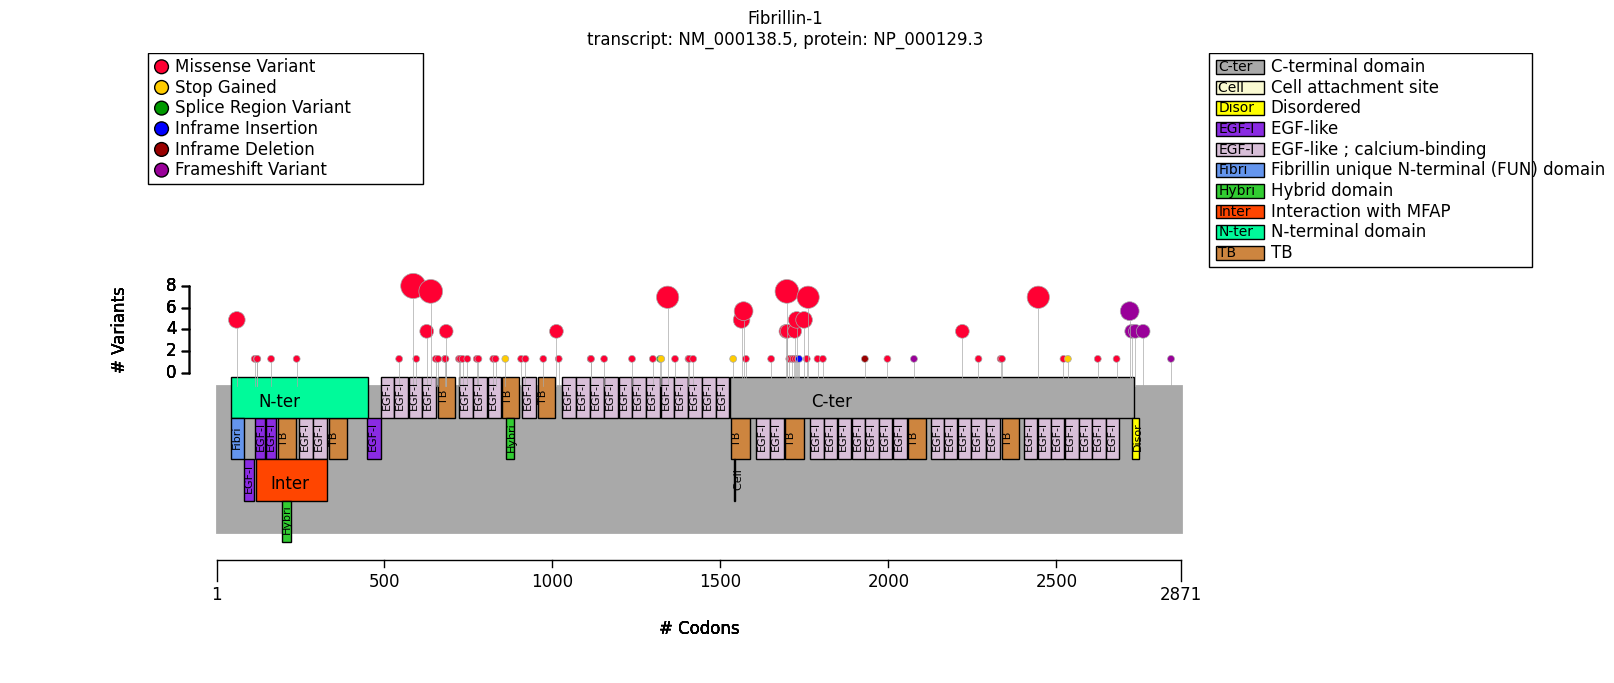

In [5]:
from gpsea.preprocessing import UniprotProteinMetadataService
from gpsea.model.genome import GRCh38
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(FBN1_MANE_transcript)
from gpsea.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_meta = pms.annotate(FBN1_protein_id)
from gpsea.view import ProteinVisualizable, ProteinVisualizer
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

In [6]:
viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

In [7]:
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates, ProteinPredicates
from gpsea.analysis.predicate import PatientCategories

config = CohortAnalysisConfiguration()
config.pval_correction = 'fdr_bh'
config.hpo_mtc_strategy(0.4)
analysis = configure_cohort_analysis(cohort, hpo, config=config)

In [8]:
is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=FBN1_MANE_transcript)

missense = analysis.compare_hpo_vs_genotype(is_missense)
missense.summarize(hpo, category=PatientCategories.YES)


MISSENSE_VARIANT on NM_000138.5                       Yes             No  \
                                                    Count Percent  Count   
Finger joint hypermobility [HP:0006094]              0/28      0%   9/11   
Arachnodactyly [HP:0001166]                         34/65     52%  20/22   
High palate [HP:0000218]                            19/51     37%  14/17   
Hyperextensibility of the finger joints [HP:000...   0/28      0%    3/5   
Thoracic aortic aneurysm [HP:0012727]               26/26    100%   8/13   
Pectus carinatum [HP:0000768]                        5/39     13%    5/7   
Aortic aneurysm [HP:0004942]                        26/26    100%  12/17   
Scoliosis [HP:0002650]                              20/49     41%  10/12   
Joint hypermobility [HP:0001382]                    26/54     48%  12/14   
Ectopia lentis [HP:0001083]                         68/72     94%  14/19   
Striae distensae [HP:0001065]                       11/33     33%    4/5   
Glaucoma [HP:0000501]                                5/41     12%    1/2   
Disproportionate tall stature [HP:0001519]           6/28     21%    3/6   
Tall stature [HP:0000098]                           29/51     57%   9/12   
Pectus excavatum [HP:0000767]                       13/45     29%   7/16   
Aortic root aneurysm [HP:0002616]                   26/68     38%   8/15   
Mitral valve prolapse [HP:0001634]                  16/44     36%   9/18   
Pes planus [HP:0001763]                             11/11    100%    7/8   
Dural ectasia [HP:0100775]                            1/1    100%    5/6   
Myopia [HP:0000545]                                 56/63     89%  22/24   

MISSENSE_VARIANT on NM_000138.5                                           \
                                                   Percent       p value   
Finger joint hypermobility [HP:0006094]                82%  2.595379e-07   
Arachnodactyly [HP:0001166]                            91%  9.756059e-04   
High palate [HP:0000218]                               82%  1.751142e-03   
Hyperextensibility of the finger joints [HP:000...     60%  1.832845e-03   
Thoracic aortic aneurysm [HP:0012727]                  62%  2.235318e-03   
Pectus carinatum [HP:0000768]                          71%  3.109594e-03   
Aortic aneurysm [HP:0004942]                           71%  6.428436e-03   
Scoliosis [HP:0002650]                                 83%  1.058068e-02   
Joint hypermobility [HP:0001382]                       86%  1.522471e-02   
Ectopia lentis [HP:0001083]                            74%  1.749912e-02   
Striae distensae [HP:0001065]                          80%  6.852983e-02   
Glaucoma [HP:0000501]                                  50%  2.624585e-01   
Disproportionate tall stature [HP:0001519]             50%  3.058464e-01   
Tall stature [HP:0000098]                              75%  3.336667e-01   
Pectus excavatum [HP:0000767]                          44%  3.554955e-01   
Aortic root aneurysm [HP:0002616]                      53%  3.855167e-01   
Mitral valve prolapse [HP:0001634]                     50%  3.965573e-01   
Pes planus [HP:0001763]                                88%  4.210526e-01   
Dural ectasia [HP:0100775]                             83%  1.000000e+00   
Myopia [HP:0000545]                                    92%  1.000000e+00   

MISSENSE_VARIANT on NM_000138.5                                       
                                                   Corrected p value  
Finger joint hypermobility [HP:0006094]                     0.000005  
Arachnodactyly [HP:0001166]                                 0.008941  
High palate [HP:0000218]                                    0.008941  
Hyperextensibility of the finger joints [HP:000...          0.008941  
Thoracic aortic aneurysm [HP:0012727]                       0.008941  
Pectus carinatum [HP:0000768]                               0.010365  
Aortic aneurysm [HP:0004942]                                0.018367  
Scoliosis [HP:0

In [9]:
prot_pred = ProteinPredicates(pms)
is_feature = prot_pred.protein_feature("TB 7", tx_id=FBN1_MANE_transcript)
tb4 = analysis.compare_hpo_vs_genotype(is_feature)

KeyboardInterrupt: 